<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Fabulous-tokenizers_disaster_tweets_repository/blob/master/Fabulous_Tokenizers__Project_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Defining our question

> Many institutions such as disaster-relief organizations and news agencies have been interested in using twitter to get information on emergencies. However, some of the tweets on twitter are real disaster tweets while some are not. Due to the increased use of twitter as a platform for announcing disasters, we have been tasked to build a machine learning model that determines whether or not a tweet is a real disaster tweet or not.


### a) Specifying the Question

> Predict which tweets are about real disasters and which ones are not.


### b) Defining the Metric for Success
Our study will be successful if we are able to:

* Build models that classify tweets that are disasters and those that are not. 
* Build models with an accuracy of 80%


### c) Understanding the context

> Twitter has become an important communication channel in times of emergency.The use of smart phones enables people to announce an emergency they’re observing in real-time and as a result, more agencies are interested in programmatically monitoring Twitter (i.e. disaster relief organizations and news agencies.)

### d) Recording the Experimental Design

**1) Business Understanding:** Understanding the business problem.

**2) Reading the data:** Getting access to our train, test and sample submission data and reading it on  python pandas.

**3) Checking our data:** Understanding our variables, the number of rows and columns per dataset as well as unique values in the data.

**4) Data cleaning:** Checking for any missing values, duplicates and solving them.

**5) Text Preprocessing:**  removing noise from our text data,converting all our data to lowercase, removing stop-words and word tokenization . 

**6)EDA:** visualizing our data.

**7) Implementing the solution (Modelling):** using classification algorithms like SVM, Naive Bayes and Bert Tokenizer to make predictions.

**8) Conclusion:** concluding on the best model for our predictions.

# 2.) Understanding our data.

## Reading our data

In [ ]:
# Loading libraries
import numpy as np
import pandas as pd

In [ ]:
# Reading the data
train= pd.read_csv("/content/train (7).csv")
test= pd.read_csv("/content/test (5).csv")
submit= pd.read_csv("/content/sample_submission.csv")

In [ ]:
# Loading the head
print("Train")
print(train.head())
print("")
print("Test")
print(test.head())
print("")
print("Sample Submission")
print (submit.head())

Train
   id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1

[5 rows x 5 columns]

Test
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

Sample Submission
   id  target
0   0       0
1   2       0

In [ ]:
# dtypes
print(train.dtypes)
print("")
print(test.dtypes)

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

id           int64
keyword     object
location    object
text        object
dtype: object


In [ ]:
# Shape
print("Train number of rows and columns are : ", train.shape)
print("Test number of rows and columns are : ", test.shape)
print("Sample submission number of rows and columns are : ", submit.shape)

Train number of rows and columns are :  (7613, 5)
Test number of rows and columns are :  (3263, 4)
Sample submission number of rows and columns are :  (3263, 2)


In [ ]:
# Lets see what non diasaster tweet looks like
non_disaster = train[train['target']==0]['text']
non_disaster.values[10]

'no wayi cant eat that shit'

In [ ]:
# Lets see what diasaster tweet looks like
disaster_t = train[train['target']==1]['text']
disaster_t.values

array(['our deeds are the reason of this earthquake may allah forgive us all',
       'forest fire near la ronge sask canada',
       'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected',
       ..., '   s of volcano hawaii ',
       'police investigating after an ebike collided with a car in little portugal ebike rider suffered serious nonlife threatening injuries',
       'the latest more homes razed by northern california wildfire  abc news '],
      dtype=object)

## Data Cleaning

#### **Missing values**

In [ ]:
# Null values
print("")
print("Train missing per column")
print(train.isnull().sum())
print("")
print("Test missing per column")
print(test.isnull().sum())
print("")
print("Sample submission missing per column")
print(submit.isnull().sum())


Train missing per column
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Test missing per column
id             0
keyword       26
location    1105
text           0
dtype: int64

Sample submission missing per column
id        0
target    0
dtype: int64


> Missing variables per column train, test and submit

In [ ]:
# Dropping null values
train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
# Confirming the number of missing values for both train and test
print("Number of missing values in train",train.isnull().sum().sum())
print("Number of missing values in test",test.isnull().sum().sum())

Number of missing values in train 0
Number of missing values in test 0


#### **Duplicates**

In [ ]:
# Duplicates
print("Train duplicated? ", train.duplicated().any())

print("")
print("Test duplicated? ", test.duplicated().any())

print("")
print("Sample submission duplicated? ",submit.duplicated().any())


Train duplicated?  False

Test duplicated?  False

Sample submission duplicated?  False


> No duplicates. 

#### **Checking for consistency and uniformity**

In [ ]:
# Checking for unique values per column
for column in train.columns:
  print('\n')
  print(train[column].nunique())
  print(train[column].unique())



5080
[   48    49    50 ... 10831 10832 10833]


221
['ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devas

> Our target has two unique values.

In [ ]:
# Editing the location entries that mean exactly the same thing
train['location'] = train['location'].replace(['United States'],'USA')
train['location'] = train['location'].replace(['United Kingdom'],'UK')
train['location'] = train['location'].replace(['NYC'],'New York')
train['location'] = train['location'].replace(['New York, NY'],'New York')
train['location'] = train['location'].replace(['Washington, D.C'],'Washington, DC')
train['location'] = train['location'].replace(['Los Angeles, CA'],'Los Angeles')
train['location'] = train['location'].replace(['Chicago, IL'],'Chicago')
train['location'] = train['location'].replace(['San Fransisco, CA'],'San Fransisco')

#### **Checking for anomalities**

In [ ]:
# checking for tweets that have been labelled as both disaster and not disaster
df_mislabeled = train.groupby(['text']).nunique().sort_values(by='target', ascending=False)
df_mislabeled = df_mislabeled[df_mislabeled['target'] > 1]['target']
df_mislabeled.index.tolist()

['.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4',
 'I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????',
 'like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit',
 'RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG',
 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!',
 "Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...",
 '#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect',
 '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption']

In [ ]:
# Removing texts that are both disaster and not disaster shown above
train= train[~((train.text=='.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4')|(train.text=='I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????')|(train.text=='like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit')|(train.text=='RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG')|(train.text=='In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!')|(train.text=="Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...")|(train.text== '#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect')|(train.text=='#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption')
)]

In [ ]:
# Confirming that the double labled data has been removed
df_2labeled = train.groupby(['text']).nunique().sort_values(by='target', ascending=False)
df_2labeled = df_2labeled[df_2labeled['target'] > 1]['target']
df_2labeled.index.tolist()

[]

> As shown above, the tweets labelled as both disaster and not disaster have been removed.

## Text pre-processing

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer # For tokenization
from nltk.stem import WordNetLemmatizer,PorterStemmer # For lemmatization
from nltk.corpus import stopwords# To remove stop words
nltk.download('stopwords')
nltk.download('wordnet')
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") # removing html files
    cleanr = re.compile('<.*?>') # Removing punctuation
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext) # Removing links
    rem_num = re.sub('[0-9]+', '', rem_url)  # Removing numbers
    tokenizer = RegexpTokenizer(r'\w+') # Tokenization
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

# Mapping our loop to our datasets
test['cleanText']=test['text'].map(lambda s:preprocess(s))
train['cleanText']=train['text'].map(lambda s:preprocess(s))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# 3.) EDA

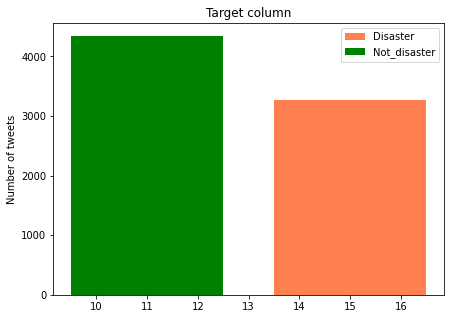

In [ ]:
# Bar plot of the two classes (disaster & not disaster)
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(15,Disaster,3, label="Disaster", color='coral')
plt.bar(11,Not_disaster,3, label="Not_disaster", color='green')
plt.ylabel('Number of tweets')
plt.title('Target column')
plt.legend()
plt.show()

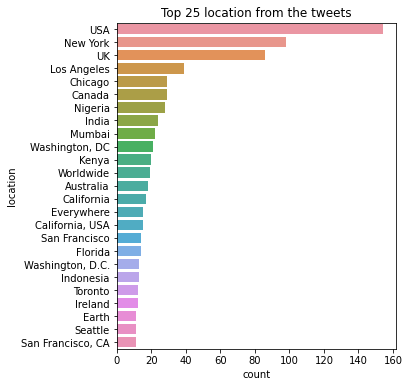

In [ ]:
# Check the most frequent location
import seaborn as sns
plt.figure(figsize=(5,6))
sns.countplot(y=train.location, order = train.location.value_counts().iloc[:25].index)
plt.title('Top 25 location from the tweets')
plt.show()

> The highest number of records are those of USA 

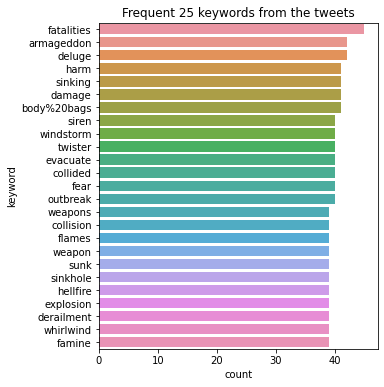

In [ ]:
# Check the most frequent keywords
plt.figure(figsize=(5,6))
sns.countplot(y=train.keyword, order = train.keyword.value_counts().iloc[:25].index)
plt.title('Frequent 25 keywords from the tweets')
plt.show()

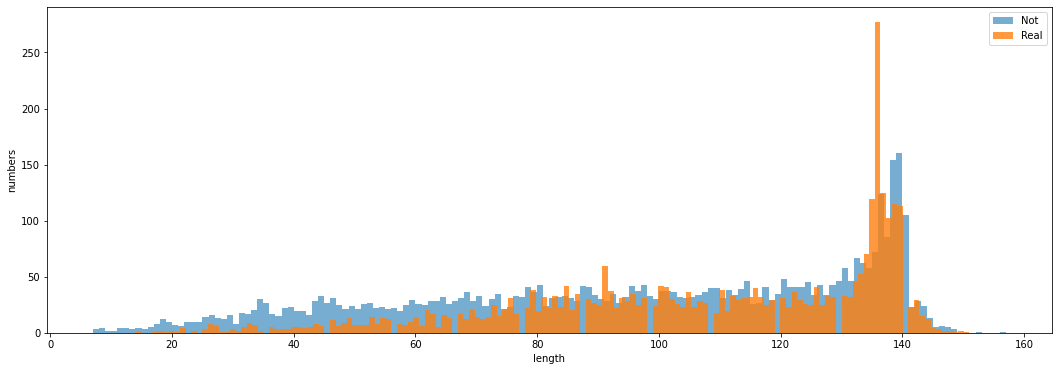

In [ ]:
# Distribution of real or not real
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(train[train['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train[train['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
#plt.xlim(0,150)

plt.show()

> * Both of our targets are skewed to the left.

### Pandas Profiling

In [ ]:
 # Installing pandas profiling
 !pip install pandas_profiling
 !pip3 install pandas_profiling --upgrade

In [ ]:
# Creating a pandas profiling report for the train dataset
from pandas_profiling import ProfileReport
profile = ProfileReport(train,html={'style':{'full_width':True}})
profile 

> *  From our dataset, the most repeated keywords are fatalities, deluge, armageddon, damage and harm.
>* The highest recorded location is USA followed by UK and Canada.
>* There is no correlation in our data.

count    5080.000000
mean        8.867717
std         3.405377
min         1.000000
25%         6.000000
50%         9.000000
75%        11.000000
max        21.000000
Name: cleanText, dtype: float64


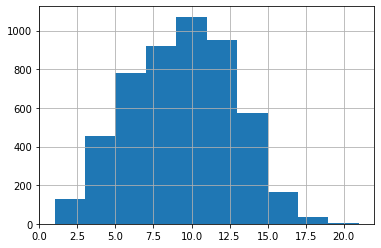

In [ ]:
# Getting the statistical distribution of our text data
lens = train_df.cleanText.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

Our texts has an average of 9 words per tweet.

In [ ]:
# The most used words in our text are
# In this step, I find the most frequent words in the data, extracting information about its content and topics.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(train_df.cleanText)
w=pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(20)
w.head()

,0
like,236
amp,216
new,178
fire,175
via,159


> The most used words are like, amp, new and fire. 

In [ ]:
# check for frequent bi-gram words
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(train_df.cleanText)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(20)

,0
burning buildings,44
suicide bomber,29
looks like,28
youtube video,27
oil spill,26
liked youtube,26
full read,26
prebreak best,25
cross body,24
mass murder,24


> Some of the most used bi-gram words are burning buildings	(44), suicide bomber (29), looks like	(28) and youtube video (27).

In [ ]:
# To show distribution of stop words in our original data
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))
#
corpus=[]
new= train['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

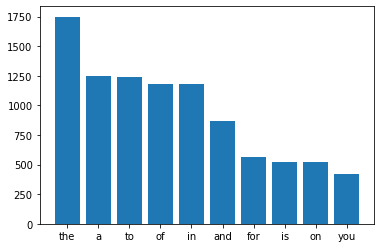

In [ ]:
# Stop words
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

> The highest recorded stop word is 'the' followed by 'a'.

# 4.) Modelling

### Naive Bayes ( Multinomial)
*  We will use naive bayes as our base model as it can be able to classify an NLP problem. The model we will use should therefore be more accurate than the Naive Bayes.

* Naive Bayes is relatively robust, easy to implement, fast, and accurate, it is used in many different fields like .

Assumptions:  
>* Features in the dataset are mutually independent. Occurrence of one feature does not affect the probability of occurrence of the other feature.


In [ ]:
# Naive Bayes
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  79.39632545931758


Our Naive Bayes model performed fairly well with an accuracy of 79% which is not so bad for a classification problem.

In [ ]:
#Getting the metrics for assessing our baseline model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(Test_Y,predictions_NB))
print(classification_report(Test_Y,predictions_NB))

[[773  83]
 [231 437]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       856
           1       0.84      0.65      0.74       668

    accuracy                           0.79      1524
   macro avg       0.81      0.78      0.78      1524
weighted avg       0.80      0.79      0.79      1524



* Naive Bayes made (773+437 ) correct predictions and (231 + 83) false predictions. 

### SVM


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  78.21522309711287


In [ ]:
print(confusion_matrix(Test_Y,predictions_SVM))
print(classification_report(Test_Y,predictions_SVM))

[[736 120]
 [222 446]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       856
           1       0.79      0.67      0.72       668

    accuracy                           0.78      1524
   macro avg       0.78      0.76      0.77      1524
weighted avg       0.78      0.78      0.77      1524



> Our SVM model has an accuracy of 78% with ( 736 + 446) correct predictions and (222 + 120) false predictions.

## BERT (Bidirectional Encoder Representations from Transformers) 


In [ ]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

In [ ]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
pip install sentencepiece

     |████████████████████████████████| 1.1MB 8.1MB/s 


In [ ]:
import tokenization

In [ ]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(clf_output)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=2e-6), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

CPU times: user 22.2 s, sys: 4.55 s, total: 26.8 s
Wall time: 36.4 s


In [ ]:
## Loading a tokenizer from the bert layer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
##Encoding the text into tokens, masks, and segment flags:
train_input = bert_encode(train.text.values, tokenizer, max_len=160)
test_input = bert_encode(test.text.values, tokenizer, max_len=160)
train_labels = train.target.values

In [ ]:
train_labels

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
test_input[:1]

(array([[  101,  2074,  3047, ...,     0,     0,     0],
        [  101,  2657,  2055, ...,     0,     0,     0],
        [  101,  2045,  2003, ...,     0,     0,     0],
        ...,
        [  101,  2665,  2240, ...,     0,     0,     0],
        [  101, 12669,  3314, ...,     0,     0,     0],
        [  101,  1001,  2103, ...,     0,     0,     0]]),)

In [ ]:
model = build_model(bert_layer, max_len=160)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

In [ ]:
train_history = model.fit(
    train_input, train_labels,
    validation_split=0.2,
    epochs=5,
    batch_size=16
)

model.save('model.h5')

Epoch 1/5
381/381 [==============================] - 691s 2s/step - loss: 0.4694 - accuracy: 0.7867 - val_loss: 0.4045 - val_accuracy: 0.8273
Epoch 2/5
381/381 [==============================] - 703s 2s/step - loss: 0.3279 - accuracy: 0.8644 - val_loss: 0.4026 - val_accuracy: 0.8372
Epoch 3/5
381/381 [==============================] - 703s 2s/step - loss: 0.2316 - accuracy: 0.9089 - val_loss: 0.4390 - val_accuracy: 0.8293
Epoch 4/5
381/381 [==============================] - 703s 2s/step - loss: 0.1429 - accuracy: 0.9486 - val_loss: 0.4964 - val_accuracy: 0.8227
Epoch 5/5
381/381 [==============================] - 704s 2s/step - loss: 0.0862 - accuracy: 0.9711 - val_loss: 0.5306 - val_accuracy: 0.8247


In [ ]:
test_pred = model.predict(test_input)

In [ ]:
len(test_pred)

3263

In [ ]:
sub['target'] = test_pred.round().astype(int)
sub.to_csv('submission.csv', index=False)
sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


## Flair on GPU

In [ ]:
pip install flair

     |████████████████████████████████| 337kB 4.7MB/s 
     |████████████████████████████████| 798kB 13.3MB/s 
     |████████████████████████████████| 983kB 22.6MB/s 
     |████████████████████████████████| 1.1MB 39.6MB/s 
     |████████████████████████████████| 1.1MB 53.9MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 276kB 58.0MB/s 
     |████████████████████████████████| 19.7MB 162kB/s 
     |████████████████████████████████| 3.0MB 56.9MB/s 
     |████████████████████████████████| 890kB 58.0MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116677 sha256=15526574d6fdf228182c80bb20c07a1778f91903d5e8d9a7e764418e1c05a001
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=0e7370a1356aca6a10bf91e4e9276882c7b8d445a4e53013e6a094a8ea7f6e21
  Stored in directory: /roo

 How It Works

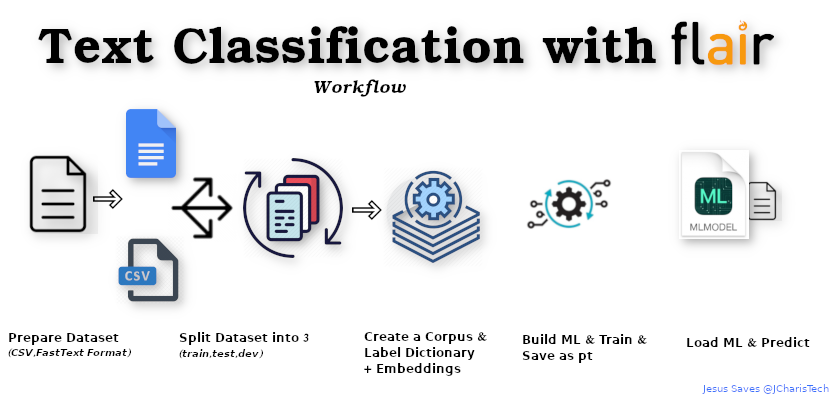

In [1]:
from IPython.display import Image
Image('/content/flair.png')


In [ ]:
## Some preprocessing
import re

allowed_chars = ' AaBbCcDdEeFfGgHhIiJjKkLlMmNnOoPpQqRrSsTtUuVvWwXxYyZz0123456789~`!@#$%^&*()-=_+[]{}|;:",./<>?'
punct = '!?,.@#'
maxlen = 280

def preprocess(text):
    return ''.join([' ' + char + ' ' if char in punct else char for char in [char for char in re.sub(r'http\S+', 'http', text, flags=re.MULTILINE) if char in allowed_chars]])[:maxlen]
    # Applying preprocessing on our train data
df['text']=df['text'].apply(preprocess)    

In [ ]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,"13 , 000 people receive # wildfires evacuatio...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1


In [ ]:
## Data Preparation
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# Adding labels to our target 
condition=[
           (df['target']==1),
           (df['target']==0)
]

values=['Disaster','No_Disaster']

df['labels']=np.select(condition,values)
df.head()

,id,keyword,location,text,target,labels
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1,Disaster
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1,Disaster
2,5,NaN,NaN,All residents asked to shelter in place are be...,1,Disaster
3,6,NaN,NaN,"13 , 000 people receive # wildfires evacuatio...",1,Disaster
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1,Disaster


In [ ]:
# Selecting the text and the labels which is relevant for our flair model
df1=df[['text','labels']]
df1.head()

,text,labels
0,Our Deeds are the Reason of this # earthquake...,Disaster
1,Forest fire near La Ronge Sask . Canada,Disaster
2,All residents asked to shelter in place are be...,Disaster
3,"13 , 000 people receive # wildfires evacuatio...",Disaster
4,Just got sent this photo from Ruby # Alaska a...,Disaster


In [ ]:
## Converting to FastText
df_fast_text=df1.copy()
df_fast_text['labels'] = '__label__'+ df_fast_text['labels'].astype(str)

In [ ]:
## Rearanging the dataframe to the required format
df_fast_text=df_fast_text[['labels','text']]
df_fast_text.head()

,labels,text
0,__label__Disaster,Our Deeds are the Reason of this # earthquake...
1,__label__Disaster,Forest fire near La Ronge Sask . Canada
2,__label__Disaster,All residents asked to shelter in place are be...
3,__label__Disaster,"13 , 000 people receive # wildfires evacuatio..."
4,__label__Disaster,Just got sent this photo from Ruby # Alaska a...


In [ ]:
## splitting the FastText into 3 required by the model
train_fst,test_fst,dev_fst=np.split(df_fast_text,[int(.6*len(df_fast_text)),int(.8*len(df_fast_text))])
# Viewing the shape of the three splits
print(train_fst.shape)
print(test_fst.shape)
print(dev_fst.shape)

(4567, 2)
(1523, 2)
(1523, 2)


In [ ]:
### Storing allthe three in one folder 
!mkdir -p data_fst

In [ ]:
## storing them into one folder 
train_fst.to_csv('/content/data_fst/train.csv',index=False,header=False,sep='\t')
test_fst.to_csv('/content/data_fst/test.csv',index=False,header=False,sep='\t')
dev_fst.to_csv('/content/data_fst/dev.csv',index=False,header=False,sep='\t')

In [ ]:
## Cheking to see if the items exist
!ls data_fst

dev.csv  test.csv  train.csv


The files have been stored.

In [ ]:
# Creating the corpus
from flair.datasets import ClassificationCorpus
from flair.data import Corpus
# Loading the folder we just created
data_folder='/content/data_fst/'

In [ ]:
# Applying the corpus on our folder
corpus_fst:Corpus=ClassificationCorpus(data_folder)

2020-10-06 19:04:35,960 Reading data from /content/data_fst
2020-10-06 19:04:35,961 Train: /content/data_fst/train.csv
2020-10-06 19:04:35,962 Dev: /content/data_fst/dev.csv
2020-10-06 19:04:35,962 Test: /content/data_fst/test.csv


In [ ]:
# Creating the label dictionary
label_dict=corpus_fst.make_label_dictionary()

2020-10-06 19:05:05,797 Computing label dictionary. Progress:


100%|██████████| 6090/6090 [00:03<00:00, 1877.24it/s]

2020-10-06 19:05:09,149 [b'Disaster', b'No_Disaster']


In [ ]:
##Creating the embedings
from flair.embeddings import FlairEmbeddings, BertEmbeddings
# init Flair embeddings
flair_forward_embedding = FlairEmbeddings('multi-forward')
flair_backward_embedding = FlairEmbeddings('multi-backward')

# init multilingual BERT
bert_embedding = BertEmbeddings('bert-base-multilingual-cased')

2020-10-06 19:05:35,746 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-jw300-forward-v0.1.pt not found in cache, downloading to /tmp/tmpqxb6d7oe


100%|██████████| 172513724/172513724 [00:10<00:00, 16929302.25B/s]

2020-10-06 19:05:46,427 copying /tmp/tmpqxb6d7oe to cache at /root/.flair/embeddings/lm-jw300-forward-v0.1.pt


2020-10-06 19:05:46,696 removing temp file /tmp/tmpqxb6d7oe
2020-10-06 19:06:02,865 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-jw300-backward-v0.1.pt not found in cache, downloading to /tmp/tmp_2m7so7t


100%|██████████| 172513724/172513724 [00:10<00:00, 16054719.88B/s]

2020-10-06 19:06:14,090 copying /tmp/tmp_2m7so7t to cache at /root/.flair/embeddings/lm-jw300-backward-v0.1.pt


2020-10-06 19:06:14,430 removing temp file /tmp/tmp_2m7so7t


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated method __init__. (Use 'TransformerWordEmbeddings' for all transformer-based word embeddings) -- Deprecated since version 0.4.5.
  import sys


In [ ]:
from flair.embeddings import DocumentLSTMEmbeddings,DocumentRNNEmbeddings

In [ ]:
#Combinning the embedings

from flair.embeddings import StackedEmbeddings

# now create the StackedEmbedding object that combines all embeddings
stacked_embeddings = StackedEmbeddings(
    embeddings=[flair_forward_embedding, flair_backward_embedding, bert_embedding])

In [ ]:
from flair.data import Sentence
sentence = Sentence('The grass is green .')

# just embed a sentence using the StackedEmbedding as you would with any single embedding.
stacked_embeddings.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print()
    print(token.embedding)
    print('-'*100)

Token: 1 The

tensor([0.6800, 0.2429, 0.0012,  ..., 0.3829, 0.4721, 0.2985], device='cuda:0')
----------------------------------------------------------------------------------------------------
Token: 2 grass

tensor([ 2.9200e-01,  2.2066e-02,  4.5290e-05,  ...,  8.5283e-01,
        -5.0725e-02,  3.4476e-01], device='cuda:0')
----------------------------------------------------------------------------------------------------
Token: 3 is

tensor([-0.5447,  0.0229,  0.0078,  ..., -0.1828,  0.7153,  0.0051],
       device='cuda:0')
----------------------------------------------------------------------------------------------------
Token: 4 green

tensor([1.4772e-01, 1.0973e-01, 8.5618e-04,  ..., 1.0157e+00, 7.5358e-01,
        1.1230e-01], device='cuda:0')
----------------------------------------------------------------------------------------------------
Token: 5 .

tensor([-1.5555e-01,  6.7598e-03,  5.3829e-06,  ..., -6.0930e-01,
         9.0591e-01,  1.7857e-01], device='cuda:0')
----

In [ ]:
word_embeddings=[flair_forward_embedding, flair_backward_embedding, bert_embedding]
documnt_embedings= DocumentRNNEmbeddings(word_embeddings,hidden_size=512,reproject_words=True,reproject_words_dimension=256)

In [ ]:
## Building and Trainning The Model
from flair.models import  TextClassifier
from flair.trainers import ModelTrainer

In [ ]:
clf=TextClassifier(documnt_embedings,label_dictionary=label_dict)

In [ ]:
### initialise
trainer=ModelTrainer(clf,corpus_fst)

In [ ]:
## Training the model with ten epochs
trainer.train('data',max_epochs=10)

2020-10-06 19:07:09,782 ----------------------------------------------------------------------------------------------------
2020-10-06 19:07:09,785 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.1, inplace=False)
          (encoder): Embedding(11854, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=11854, bias=True)
        )
      )
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.1, inplace=False)
          (encoder): Embedding(11854, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=11854, bias=True)
        )
      )
      (list_embedding_2): BertEmbeddings(
        (model): BertModel(
          (embeddings): BertEmbeddings(
            (word_embeddings): Embedding(119547, 7

{'dev_loss_history': [1.0698940753936768,
  0.5662962794303894,
  0.45362573862075806,
  0.7581333518028259,
  0.4594651162624359,
  0.5364760160446167,
  0.42257651686668396,
  0.47728419303894043,
  0.4398036599159241,
  0.4401063621044159],
 'dev_score_history': [0.5437,
  0.6921,
  0.7991,
  0.6494,
  0.7846,
  0.7295,
  0.8253,
  0.8076,
  0.8076,
  0.8076],
 'test_score': 0.7919,
 'train_loss_history': [0.8953827550778022,
  0.6747017052623775,
  0.6095733465431453,
  0.5448296363953944,
  0.5272426867818499,
  0.5184996203109101,
  0.5033309342977884,
  0.4786830960245399,
  0.4687075648274455,
  0.4702325667534675]}

The flair model has given us an accuracy of 79%

In [ ]:
## Making Prediction on Raw Text
new_clf=TextClassifier.load('/content/data/best-model.pt')
# Importing sentence
from flair.data import Sentence

2020-10-06 19:23:08,024 loading file /content/data/best-model.pt


In [ ]:
# Creating the first sentence
frst_sentence=Sentence('I was just sitted, when i suddenly heard a loud bang')
# Making our model predict the first sentence/ tweet
new_clf.predict(frst_sentence)
frst_sentence.labels

[No_Disaster (0.8325)]

> According to our model, there is 83% chance that our first sentence is not a disaster tweet which is accurate.

In [ ]:
# Creating the second sentence/ tweet
second_sentence=Sentence('Many have beeninjured , Afew Died on the spot')
# Making our model predict the second sentence / tweet.
new_clf.predict(second_sentence)
second_sentence.labels

[Disaster (0.7433)]

> According to our model, there is 74% chance that the second tweet is a disaster tweet which is quite accurate.

In [ ]:
# Creating the third sentence/ tweet
third_sentence=Sentence('Tsunamis swept through rice fields and flooded the towns.')
# Making our model predict the third sentence / tweet.
new_clf.predict(third_sentence)
third_sentence.labels

[Disaster (0.9355)]

> According to our model, there is 93% chance that the third tweet is a disaster tweet.

> This model  ranked number 334  out of 1356  .Its a good baseline model and we can  brainstorm on how to improve  its accuracy

# 5.) Conclusions and Recommendations


---
* For our project, Bert transformer and flair has performed better than the ordinary classification models.



# 6.) Follow up Questions




---

#### Did we have the correct data? 

>Yes 

